# Epithelium

### graph / dataframe interface


## I/O

- hdf_snapshot


## topology

### graphs

- full graph
- cells graph
- junctions graph

### dataframes

- vertex df
- edge df
- triangles

### actions

- add vertex
- add cell
- add junction
- remove cell
- remove junction




## geometry

- position
- height / area / volume


## dynamics

- energy
- gradient
- optimisation
  + local
  + global


## filters

- cell vertices
- junction edges
- local
- active

## events

- division
- T1
- T3
- apoptosis


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import pandas as pd
import graph_tool.all as gt
from scipy import optimize

from leg_joint.epithelium import Epithelium

import leg_joint as lj


In [2]:
eptm = Epithelium()

2015-03-28 10:34:43,316 -leg_joint.epithelium.epithelium -__init__ -- INFO -Instanciating epithelium 0
2015-03-28 10:34:43,317 -leg_joint.epithelium.epithelium -__init__ -- INFO -Created new graph
2015-03-28 10:34:43,391 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial cells
2015-03-28 10:34:43,392 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial junctions
2015-03-28 10:34:43,438 -leg_joint.epithelium.epithelium -__init__ -- INFO -Update geometry


In [3]:
eptm.isotropic_relax()

In [4]:
eptm.calc_energy(full_output=False) / eptm.norm_factor

27.579991403579676

In [5]:
eptm.update_gradient().head()/eptm.norm_factor

,gx,gy,gz
vertex,,,
1,0.019762,-0.026906,-0.011434
2,-0.013421,0.030568,-0.011434
4,0.033000,-0.005052,-0.011434
5,-0.031105,0.012125,-0.011434
7,0.026906,0.019762,-0.011434


In [16]:
%pdb

Automatic pdb calling has been turned ON


In [6]:
from leg_joint.dynamics import optimizers

In [9]:
out = optimizers.find_energy_min(eptm)

In [12]:
optimizers.check_local_grad(eptm)

2015-03-28 10:37:33,132 -leg_joint.dynamics.optimizers -check_local_grad -- INFO -Checking gradient


0.3261057335298515

In [70]:
eptm.delta_o

0.88659268738738983

In [41]:
eptm.vertex_df.vol.head()

vertex
0         64.773304
1               NaN
2               NaN
3         64.773304
4               NaN
Name: vol, dtype: float64

In [42]:
eptm.vertex_df.height.head()

vertex
0         21.143955
1         21.278224
2         21.278224
3         21.143955
4         21.278224
Name: height, dtype: float64

In [30]:
eptm.update_geometry()

In [44]:
eptm.edge_df.dtypes

is_junction_edge      uint8
dx                  float64
edge_length         float64
dz                  float64
line_tensions       float64
dy                  float64
dtype: object

In [45]:
eptm.faces.dtypes

ux          float64
uy          float64
uz          float64
ell_ij      float64
sub_area    float64
dtype: object

In [50]:
eptm.faces.sub_area

cell  jv_i  jv_j
0     1     25      7.989241
      23    24      7.989241
      24    25      7.989241
3     2     27      7.989241
      4     28      7.989241
      27    28      7.989241
6     5     30      7.989241
      7     31      7.989241
      30    31      7.989241
9     8     33      7.989241
      10    34      7.989241
      33    34      7.989241
12    11    36      7.989241
      13    37      7.989241
      36    37      7.989241
...
153   129   130     7.989241
            152     7.989241
      130   154     7.989241
156   132   133     7.989241
            155     7.989241
      133   157     7.989241
159   135   136     7.989241
            158     7.989241
      136   160     7.989241
162   138   139     7.989241
            161     7.989241
      139   163     7.989241
165   141   142     7.989241
            164     7.989241
      142   166     7.989241
Name: sub_area, Length: 288, dtype: float64

In [7]:
eptm.params

{'cell_volume': 288.0,
 'contractility': 276.48,
 'elasticity': 1.0,
 'lambda_0': 4.3,
 'line_tension': 2873.2644436598594,
 'n_sigmas': 8,
 'n_zeds': 7,
 'pos_cutoff': 0.0001,
 'pos_noise': 0.01,
 'prefered_area': 12.0,
 'prefered_height': 24.0,
 'radial_tension': 0.0,
 'rho0': 13.0,
 'rho_lumen': -11.0,
 'theta_cutoff': 0.01,
 'vol_elasticity': 1.0}

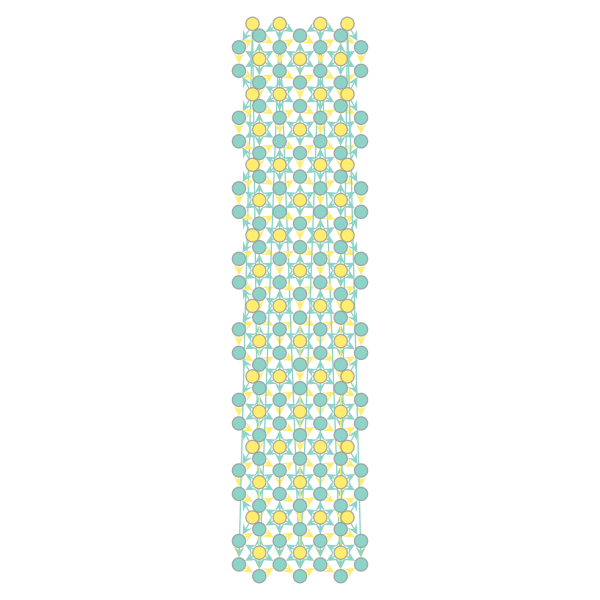

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10e2ff4828, at 0x7f10e2fee780>

In [47]:
sigma = eptm.theta.copy()

sigma.a = eptm.rho.a * eptm.theta.a
pos = gt.group_vector_property([eptm.z, sigma])
gt.graph_draw(eptm.graph, pos=pos,
              edge_color=eptm.is_junction_edge,
              vertex_fill_color=eptm.is_cell_vert, inline=True)

In [10]:
print(eptm)

<Epithelium with 56 cells and 152 junction edges at 0x7f96bcdf6358>
Identifier : 0_2015-03-26T15_14_57
Directory : /tmp/0


In [11]:
eptm.params


{'cell_volume': 288.0,
 'contractility': 276.48,
 'elasticity': 1.0,
 'lambda_0': 4.3,
 'line_tension': 2873.2644436598594,
 'n_sigmas': 8,
 'n_zeds': 7,
 'pos_cutoff': 0.0001,
 'pos_noise': 0.01,
 'prefered_area': 12.0,
 'prefered_height': 24.0,
 'radial_tension': 0.0,
 'rho0': 13.0,
 'rho_lumen': -11.0,
 'theta_cutoff': 0.01,
 'vol_elasticity': 1.0}

In [13]:
import hdfgraph

In [14]:
eptm.update_geometry()
hdfgraph.update_pmaps(eptm.graph, eptm.vertex_df, eptm.edge_df)

In [16]:
eptm.vertex_df.dtypes

theta               float64
z                   float64
x                   float64
y                   float64
is_cell_vert          int64
is_active_vert        int64
rho                 float64
area                float64
height              float64
vol                   int64
contractilities       int64
num_sides             int64
perimeters          float64
vol_elasticities      int64
radial_tensions     float64
dtype: object

In [17]:
eptm.edge_df.dtypes

is_junction_edge      uint8
edge_length         float64
dx                  float64
dy                  float64
line_tensions       float64
dz                  float64
dtype: object

In [18]:
np.bool

bool

In [15]:
eptm.graph.list_properties()

vol            (vertex)  (type: int64_t)
is_cell_vert   (vertex)  (type: int64_t)
perimeters     (vertex)  (type: int64_t)
vol_elasticities (vertex)  (type: int64_t)
area           (vertex)  (type: int64_t)
z              (vertex)  (type: double)
x              (vertex)  (type: double)
theta          (vertex)  (type: double)
is_active_vert (vertex)  (type: int64_t)
height         (vertex)  (type: int64_t)
y              (vertex)  (type: double)
num_sides      (vertex)  (type: int64_t)
contractilities (vertex)  (type: int64_t)
radial_tensions (vertex)  (type: double)
rho            (vertex)  (type: int64_t)
is_junction_edge (edge)    (type: bool)
dx             (edge)    (type: int64_t)
edge_length    (edge)    (type: int64_t)
dz             (edge)    (type: int64_t)
line_tensions  (edge)    (type: double)
dy             (edge)    (type: int64_t)


In [14]:
288/9

32.0

In [5]:
eptm.vertex_df.is_cell_vert

vertex
0         1
1         0
2         0
3         1
4         0
5         0
6         1
7         0
8         0
9         1
10        0
11        0
12        1
13        0
14        0
...
489       1
490       0
491       0
492       1
493       0
494       0
495       1
496       0
497       0
498       1
499       0
500       0
501       1
502       0
503       0
Name: is_cell_vert, Length: 504, dtype: int64

In [6]:
eptm.graph.vertex_properties['is_cell_vert']

<PropertyMap object with key type 'Vertex' and value type 'int64_t', for Graph 0x7f251f1b0c18, at 0x7f251f12e128, with values:
[1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0

In [7]:
eptm.is_cell_vert.a

PropertyArray([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
    

In [17]:
import hdfgraph

In [18]:
hdfgraph.complete_pmaps(graph, vertex_df, edge_df)
hdfgraph.update_pmaps(graph, vertex_df, edge_df)


In [6]:
eptm.graph.vertex_properties['is_cell_vert']

<PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7f049f8cd5f8, at 0x7f049f8cdb00, with values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [19]:
graph.list_properties()

z              (vertex)  (type: double)
theta          (vertex)  (type: double)
y              (vertex)  (type: double)
x              (vertex)  (type: double)
is_cell_vert   (vertex)  (type: int64_t)
is_active_vert (vertex)  (type: int64_t)
is_junction_edge (edge)    (type: bool)


In [4]:
eptm.graph.list_properties()

radial_tensions (vertex)  (type: double)
is_cell_vert   (vertex)  (type: bool)
is_alive       (vertex)  (type: bool)
is_local_vert  (vertex)  (type: bool)
is_active_vert (vertex)  (type: bool)
is_junction_edge (edge)    (type: bool)
line_tensions  (edge)    (type: double)
is_local_edge  (edge)    (type: bool)
is_new_edge    (edge)    (type: bool)
is_ctoj_edge   (edge)    (type: bool)
at_boundary    (edge)    (type: bool)
is_active_edge (edge)    (type: bool)


In [1]:
%pdb

Automatic pdb calling has been turned ON


In [8]:
eptm.graph.vertex_properties['heights'].fa.dtype

KeyError: ('v', 'heights')

> /home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/graph_tool/__init__.py(1689)<lambda>()
   1688         return PropertyDict(self, self.__get_specific_properties("v"),
-> 1689                             lambda g, k: g.__properties[("v", k)],
   1690                             lambda g, k, v: g.__set_property("v", k, v),

ipdb> c


In [9]:
eptm.is_cell_vert

<PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7fe09da0bc88, at 0x7fe09da0be10, with values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Object `gt.edge_difference` not found.
